In [48]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [28]:
X = np.random.random([100,1000])

In [29]:
beta = np.random.random([100, 1])

In [30]:
w = np.exp(np.dot(beta.T, X))

In [31]:
y = w + np.random.poisson(lam=1.0, size=np.shape(w))

In [32]:
def log_likelihood_poisson(theta, X, y):
    log_likelihood = -np.sum(y*np.dot(theta.T, X)) + np.sum(np.exp(np.dot(theta.T, X)))
    return log_likelihood

In [33]:
log_likelihood_poisson(beta, X, y)

-1.3107563350408262e+16

In [19]:
def simple_convex_function(x,param1,param2):
    return (1 + np.sum(np.linalg.norm(x)) + param1 + param2)

In [20]:
param1 = 2
param2 = 3
simple_convex_function([2,2],param1,param2)

8.82842712474619

In [21]:
myguess = np.random.random([100,1])

In [22]:
res = minimize(simple_convex_function, args=(param1, param2), method = 'CG', x0 = myguess)

In [23]:
res.fun

6.000000044271272

In [24]:
np.linalg.norm(res.x)

4.4271272148539497e-08

In [44]:
myguess = np.random.normal(loc=0.0, scale= 1.0, size=np.shape(beta))
print(np.shape(myguess))
res = minimize(log_likelihood_poisson, args = (X,y), method = 'CG', x0 = myguess, options={'gtol':1e-14})

(100, 1)


In [45]:
res.fun

-1.3107563350405276e+16

In [46]:
np.linalg.norm(res.x - beta)

40.12942788387737

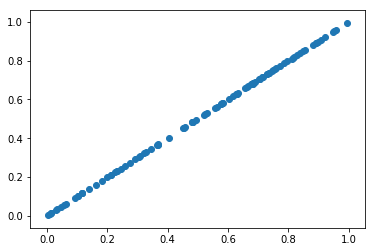

In [49]:
plt.scatter(beta, res.x)